# Battle of the Neighbourhoods - Toronto

This notebook contains Questions 1, 2 & 3 of the Assignment. They have been segregated by Section headers

### Question 1 - Importing Data

In [1]:
import pandas as pd
import requests

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
wiki_url = requests.get(url)
wiki_url

<Response [200]>

In [3]:
wiki_data = pd.read_html(wiki_url.text)
wiki_data

[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 ..          ...               ...   
 175         M5Z      Not assigned   
 176         M6Z      Not assigned   
 177         M7Z      Not assigned   
 178         M8Z         Etobicoke   
 179         M9Z      Not assigned   
 
                                          Neighbourhood  
 0                                         Not assigned  
 1                                         Not assigned  
 2                                            Parkwoods  
 3                                     Victoria Village  
 4                            Regent Park, Harbourfront  
 ..                                                 ...  
 175                                       Not assigned  
 176                                       Not assigned  
 177                

In [4]:
len(wiki_data), type(wiki_data)

(3, list)

We need the first table alone, so dropping the other tables

In [5]:
wiki_data = wiki_data[0]
wiki_data

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Dropping Borough which are not assigned

In [6]:
df = wiki_data[wiki_data["Borough"] != "Not assigned"]
df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Grouping the records based on Postal Code

In [7]:
df = df.groupby(['Postal Code']).head()
df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Checking for number of records where Neighbourhood is "Not assigned"

In [8]:
df.Neighbourhood.str.count("Not assigned").sum()

0

In [9]:
df = df.reset_index()
df

,index,Postal Code,Borough,Neighbourhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...,...
98,160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,165,M4Y,Downtown Toronto,Church and Wellesley
100,168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [10]:
df.drop(['index'], axis = 'columns', inplace = True)
df

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [11]:
df.shape

(103, 3)

#### Solution: We have 103 rows and 3 columns

### Question 2 - Installing geocoder

In [12]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [13]:
# import geocoder
import geocoder

Tried the below approach, ran for 20 mins, then killed it. Changing the code cell to Text for now so that the run all execution doesn't stop.

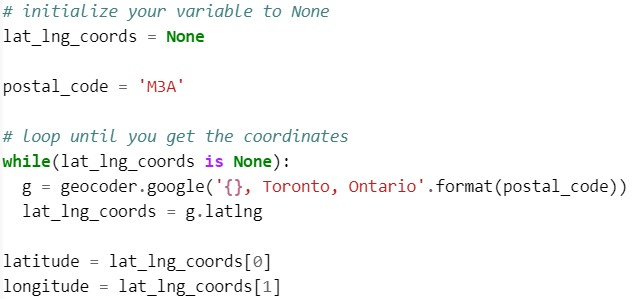

Alternatively, as suggested in the assignment, Importing the CSV file from the URL

In [14]:
data = pd.read_csv("https://cocl.us/Geospatial_data")
data

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [15]:
print("The shape of our wiki data is: ", df.shape)
print("the shape of our csv data is: ", data.shape)

The shape of our wiki data is:  (103, 3)
the shape of our csv data is:  (103, 3)


Since the dimensions are the same, we can try to join on the postal codes to get the required data.
Checking the column types of both the dataframes, especially Postal Code column since we are trying to join on it

In [16]:
df.dtypes

Postal Code      object
Borough          object
Neighbourhood    object
dtype: object

In [17]:
data.dtypes

Postal Code     object
Latitude       float64
Longitude      float64
dtype: object

In [18]:
combined_data = df.join(data.set_index('Postal Code'), on='Postal Code', how='inner')
combined_data

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [19]:
combined_data.shape

(103, 5)

#### Solution: We get 103 rows as expected when we do a inner join, so we have good data.

### Question 3

Drawing inspiration from the previous lab where we cluster the neighbourhood of NYC, We cluster Toronto based on the similarities of the venues categories using Kmeans clustering and Foursquare API.

In [22]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [23]:
from geopy.geocoders import Nominatim

In [24]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The coordinates of Toronto are 43.6534817, -79.3839347.


In [26]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [27]:
import folium

In [28]:
# Creating the map of Toronto
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for latitude, longitude, borough, neighbourhood in zip(combined_data['Latitude'], combined_data['Longitude'], combined_data['Borough'], combined_data['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(map_Toronto)  
    
map_Toronto

Initializing Foursquare API credentials

In [29]:
CLIENT_ID = 'MCVLEZYYF4O5SBWB5XH1BJIIJD4AOE4FPLA3LLKAJWKIYOTW' 
CLIENT_SECRET = 'HQEBAIHA5LJH5KBLSFVZZVV2BXYCU22CTNJWXMDNV2R5RXLS'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MCVLEZYYF4O5SBWB5XH1BJIIJD4AOE4FPLA3LLKAJWKIYOTW
CLIENT_SECRET:HQEBAIHA5LJH5KBLSFVZZVV2BXYCU22CTNJWXMDNV2R5RXLS


Next, we create a function to get all the venue categories in Toronto

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

Collecting the venues in Toronto for each Neighbourhood

In [31]:
venues_in_toronto = getNearbyVenues(combined_data['Neighbourhood'], combined_data['Latitude'], combined_data['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [32]:
venues_in_toronto.shape

(1331, 5)

In [33]:
venues_in_toronto.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,Coffee Shop


In [34]:
venues_in_toronto.groupby('Neighbourhood').head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,Coffee Shop
...,...,...,...,...,...
1316,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Wingporium,Wings Joint
1317,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,South St. Burger,Burger Joint
1318,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Dollarama,Discount Store
1319,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Healthy Planet,Supplement Shop


In [35]:
venues_in_toronto.groupby('Venue Category').max()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue
Venue Category,,,,
Accessories Store,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Ardene Shoes Outlet
Adult Boutique,Church and Wellesley,43.665860,-79.383160,Seduction
Airport,Downsview,43.737473,-79.394420,Toronto Downsview Airport (YZD)
Airport Food Court,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,Billy Bishop Café
Airport Lounge,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,Porter Lounge
...,...,...,...,...
Warehouse Store,Thorncliffe Park,43.705369,-79.349372,Costco
Wine Bar,"Little Portugal, Trinity",43.653206,-79.400049,Paris Paris Bar
Wings Joint,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Wingporium


### One Hot encoding the venue Categories

In [36]:
toronto_venue_cat = pd.get_dummies(venues_in_toronto[['Venue Category']], prefix="", prefix_sep="")
toronto_venue_cat

,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
toronto_venue_cat['Neighbourhood'] = venues_in_toronto['Neighbourhood'] 

# moving neighborhood column to the first column
fixed_columns = [toronto_venue_cat.columns[-1]] + list(toronto_venue_cat.columns[:-1])
toronto_venue_cat = toronto_venue_cat[fixed_columns]

toronto_venue_cat.head()

,Neighbourhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
toronto_grouped = toronto_venue_cat.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [40]:
import numpy as np

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Breakfast Spot,Skating Rink,Lounge,Yoga Studio,Dim Sum Restaurant,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
1,"Alderwood, Long Branch",Pizza Place,Sandwich Place,Pharmacy,Coffee Shop,Pub,Gym,Airport Service,Department Store,Ethiopian Restaurant,Escape Room
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Pharmacy,Mobile Phone Shop,Shopping Mall,Diner,Sandwich Place,Deli / Bodega,Restaurant,Supermarket
3,Bayview Village,Café,Chinese Restaurant,Bank,Japanese Restaurant,Dessert Shop,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Pub,Thai Restaurant,Hobby Shop,Juice Bar,Restaurant,Café


In [42]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [43]:
# set number of clusters
k_num_clusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k_num_clusters, random_state=0).fit(toronto_grouped_clustering)
kmeans

KMeans(n_clusters=5, random_state=0)

In [44]:
kmeans.labels_[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2])

In [45]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [46]:
toronto_merged = combined_data

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,2.0,Park,Food & Drink Shop,Yoga Studio,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Pizza Place,Coffee Shop,Hockey Arena,Portuguese Restaurant,French Restaurant,Drugstore,Donut Shop,Eastern European Restaurant,Dog Run,Dance Studio
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Park,Bakery,Breakfast Spot,French Restaurant,Distribution Center,Spa,Event Space,Farmers Market,Dessert Shop
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Clothing Store,Furniture / Home Store,Accessories Store,Boutique,Miscellaneous Shop,Athletics & Sports,Carpet Store,Event Space,Gift Shop,Vietnamese Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Fried Chicken Joint,Sandwich Place,Portuguese Restaurant,Park,Mexican Restaurant,Japanese Restaurant,Italian Restaurant


In [47]:
toronto_merged_nonan = toronto_merged.dropna(subset=['Cluster Labels'])

In [48]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [49]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_nonan['Latitude'], toronto_merged_nonan['Longitude'], toronto_merged_nonan['Neighbourhood'], toronto_merged_nonan['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(map_clusters)
        
map_clusters

#### Cluster 1

In [50]:
toronto_merged_nonan.loc[toronto_merged_nonan['Cluster Labels'] == 0, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,0.0,Pizza Place,Coffee Shop,Hockey Arena,Portuguese Restaurant,French Restaurant,Drugstore,Donut Shop,Eastern European Restaurant,Dog Run,Dance Studio
2,Downtown Toronto,0.0,Coffee Shop,Park,Bakery,Breakfast Spot,French Restaurant,Distribution Center,Spa,Event Space,Farmers Market,Dessert Shop
3,North York,0.0,Clothing Store,Furniture / Home Store,Accessories Store,Boutique,Miscellaneous Shop,Athletics & Sports,Carpet Store,Event Space,Gift Shop,Vietnamese Restaurant
4,Downtown Toronto,0.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Fried Chicken Joint,Sandwich Place,Portuguese Restaurant,Park,Mexican Restaurant,Japanese Restaurant,Italian Restaurant
6,Scarborough,0.0,Fast Food Restaurant,Print Shop,Yoga Studio,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Downtown Toronto,0.0,Italian Restaurant,Café,Restaurant,Coffee Shop,Bakery,Pet Store,General Entertainment,Beer Store,Butcher,Caribbean Restaurant
97,Downtown Toronto,0.0,Café,Restaurant,Coffee Shop,Seafood Restaurant,Gluten-free Restaurant,Speakeasy,Pub,Steakhouse,Bakery,Hotel
99,Downtown Toronto,0.0,Japanese Restaurant,Pub,Ramen Restaurant,Ice Cream Shop,Indian Restaurant,Café,Diner,Italian Restaurant,Beer Bar,Bookstore
100,East Toronto,0.0,Pizza Place,Auto Workshop,Comic Shop,Restaurant,Butcher,Burrito Place,Skate Park,Brewery,Light Rail Station,Park


#### Cluster 2

In [51]:
toronto_merged_nonan.loc[toronto_merged_nonan['Cluster Labels'] == 1, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Etobicoke,1.0,Filipino Restaurant,Yoga Studio,Falafel Restaurant,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run


#### Cluster 3

In [52]:
toronto_merged_nonan.loc[toronto_merged_nonan['Cluster Labels'] == 2, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,2.0,Park,Food & Drink Shop,Yoga Studio,Department Store,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
21,York,2.0,Park,Women's Store,Pool,Deli / Bodega,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
35,East York,2.0,Park,Convenience Store,Intersection,Yoga Studio,Dessert Shop,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore
49,North York,2.0,Park,Construction & Landscaping,Basketball Court,Bakery,Yoga Studio,Dim Sum Restaurant,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
61,Central Toronto,2.0,Park,Swim School,Bus Line,Business Service,Yoga Studio,Dessert Shop,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore
66,North York,2.0,Park,Convenience Store,Yoga Studio,Department Store,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop
83,Central Toronto,2.0,Lawyer,Park,Restaurant,Trail,Yoga Studio,Distribution Center,Dim Sum Restaurant,Diner,Discount Store,Donut Shop
85,Scarborough,2.0,Intersection,Playground,Park,Arts & Crafts Store,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Yoga Studio
91,Downtown Toronto,2.0,Park,Playground,Trail,Yoga Studio,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop
101,Etobicoke,2.0,Park,Breakfast Spot,Baseball Field,Yoga Studio,Dessert Shop,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore


#### Cluster 4

In [53]:
toronto_merged_nonan.loc[toronto_merged_nonan['Cluster Labels'] == 3, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,3.0,Baseball Field,Yoga Studio,Farmers Market,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop


#### Cluster 5

In [54]:
toronto_merged_nonan.loc[toronto_merged_nonan['Cluster Labels'] == 4, toronto_merged_nonan.columns[[1] + list(range(5, toronto_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
98,Etobicoke,4.0,River,Yoga Studio,Department Store,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run


We have successfully cluster Toronto neighbourhood based on venue categories!